# Data Exploration (Members)

In [106]:
#Import the relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpld3                         #download mpld3 with pip install mpld3
import seaborn as sns
import matplotlib.dates as mdates
import time
from datetime import datetime

#Configure Panda
pd.options.display.width = 200


# 2. Members

## 2.1 Loading the data

In [107]:
#Load the population members
members_s = pd.read_csv("data/members_v3.csv")
members_s.head()



,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


First conclusions:

    1)cities are numerical values
    
    2)bd seems to contain wrong data/outliers
    
    3)gender contains null entries / possibly linked to 0 bd entries and city=1 entries
    
    4)registration method is also numerical
    
    5)data is stored in the following format: YearMonthDate -> 20180926= 26.09.2018 as a int -> need to transform to a date

In [108]:
#desriptive statistics of numerical values
print(members_s.describe())
#descriptive satistics of categorical values
print(members_s.describe(include = ['O']))

               city            bd  registered_via  registration_init_time
count  6.769473e+06  6.769473e+06    6.769473e+06            6.769473e+06
mean   3.847358e+00  9.795794e+00    5.253069e+00            2.014518e+07
std    5.478359e+00  1.792590e+01    2.361398e+00            2.318601e+04
min    1.000000e+00 -7.168000e+03   -1.000000e+00            2.004033e+07
25%    1.000000e+00  0.000000e+00    4.000000e+00            2.014042e+07
50%    1.000000e+00  0.000000e+00    4.000000e+00            2.015101e+07
75%    4.000000e+00  2.100000e+01    7.000000e+00            2.016060e+07
max    2.200000e+01  2.016000e+03    1.900000e+01            2.017043e+07
                                                msno   gender
count                                        6769473  2339968
unique                                       6769473        2
top     AFoSPsc5nnqQ9UyDIZMSfEqlh5FtXq4I44B9H6N9uDU=     male
freq                                               1  1195355


Conclusion:

CITY: 75% of the the cities are between 1 and 4 (city 1 to city 4)

BD: birthday contains outlies reaching from -7168 to +2016

REGISTERED_VIA: minimum values is 1 and max value is 19. So there seem to be 19 different methods for registration

REGISTRATION_TIME: no conclusion, because value is stored as INT

GENDER: a lot of missing values (+/- 2/3 of values are missing)



## 2.2 Univarite descriptions

### 2.2.1 Feature: City

Text(0.5,1,'Frequency count of users from different cities')

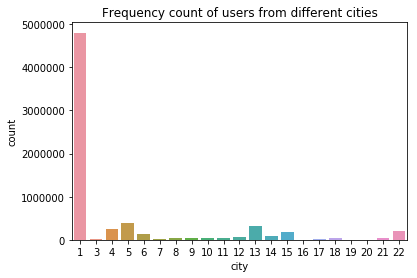

In [109]:
#Visualisation of the variable City
#enable notebook, so that a manipulation of the graphs is possible (e.g. zooming feature...)
mpld3.enable_notebook() 

sns.countplot(x="city", data=members_s).set_title('Frequency count of users from different cities')

Conclusion:by far, most users (+/- 2/3) are from city 1. This is followed by city 4,5,6,3,15 and 22.

Is this result correct, or is it directly linked to the wrong values of the birthdays? Maybe also correlated to mising gender values?

### 2.2.2 Feature: Birthday

Text(0.5,1,'Histogram for unfiltered birthdays')

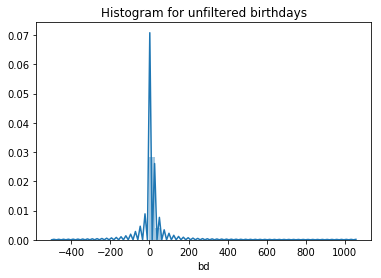

In [110]:
#Histogram of birthdays

#Generate 100.000 samples
members_sample=members_s.sample(50000)
#histogram plot
sns.distplot(members_sample.bd,bins=50).set_title('Histogram for unfiltered birthdays')


Conclusion: this plot shows that bd contains a lot of outliers. The graph shows a peak at 0.
    
    Strong outliers, huge chunk of data (+/- 2/3) around 0. Outliers seem to reach from -7000 to +1000

Text(0.5,1,'Boxplot showing the unfiltered birthday distribution')

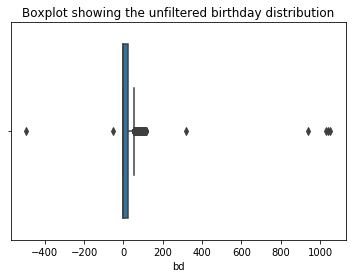

In [111]:
#Boxplot of birthdays:
sns.boxplot(members_sample.bd).set_title('Boxplot showing the unfiltered birthday distribution')

This boxplot does not provide us many information except for strong outliers and a median focused around 0. In order to see the true distribution of our data, we need to get rid of those outliers.

2226451
ratio of valid birthdays (in %):
32.88957648549599


Text(0.5,1,'Histogram for filtered birthdays')

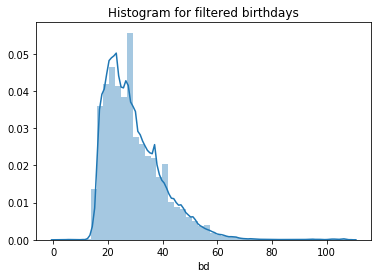

In [112]:
#Filtering the data, and repeating the two plots again

#For the plot, we filter out the NA values
members_plot_bd2=members_s[members_s.bd < 110]
members_plot_bd=members_s[members_plot_bd2 > 0]

#How many values are between 1 and 109?
print(members_plot_bd.bd.count())
#Which gives us a percentage of valid birthdays of:
ratio=(members_plot_bd.bd.count()/members_s.msno.count())*100
print("ratio of valid birthdays (in %):")
print(ratio)

#only plot values that make sense (histogram)
sns.distplot(members_plot_bd.bd.dropna(axis=0, how='all')).set_title('Histogram for filtered birthdays')


Text(0.5,1,'Boxplot showing filtered birthday distribution')

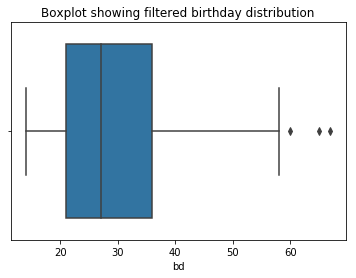

In [113]:
#Taking a sample of valid birthdays
members_plot_bd_sample=members_plot_bd.sample(1000)
#plotting the boxplot for the sample of valid birthdays only
sns.boxplot(x=members_plot_bd_sample.bd.dropna(axis=0, how='all')).set_title('Boxplot showing filtered birthday distribution')

Conclusion: Filtring out wrong outliers and non-recorded values (bd=0), we can see the distribution of the birthdays more clearly

### 2.2.3 Feature: Gender

In [114]:
#How many missing values?
members_s.gender.isna().value_counts()


True     4429505
False    2339968
Name: gender, dtype: int64

male      1195355
female    1144613
Name: gender, dtype: int64

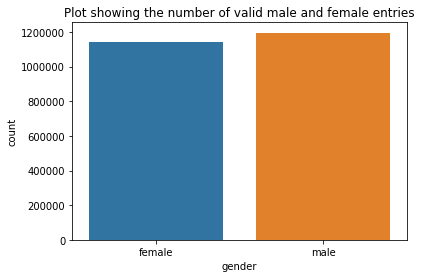

In [134]:
#For the non-missing values, how many men and women are there?
sns.countplot(x="gender", data=members_s).set_title('Plot showing the number of valid male and female entries')
members_s['gender'].value_counts()



Conclusion: Similar amount of females and males (slightly more males), however, roughly 2/3 of data is missing.
Is there a correlatio between missing gender values and bd=0?

### 2.2.4 Feature: Registered_via

Text(0.5,1,'Plot showing the count for different payment methods')

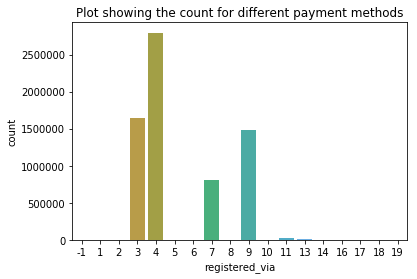

In [135]:
#Where did the users register?

sns.countplot(x="registered_via", data=members_s).set_title('Plot showing the count for different payment methods')

Conclusion:most people are registered via method 4, followd by 3,9,7. The other method are not so relevant

### 2.2.5 Feature: Registration_init_time

In [117]:
#Are there any NA values?
members_s.registration_init_time.isna().value_counts()

False    6769473
Name: registration_init_time, dtype: int64

There are no NULL values in date

In [118]:
#Data conversion, from integer to date
#print out head before conversion
print(members_s.head())
#Conversion
members_s['registration_init_time'] = members_s.registration_init_time.apply(lambda x: datetime.strptime(str(int(x)), "%Y%m%d").date() if pd.notnull(x) else "NAN" )
#Print out head after conversion
print(members_s.head())



                                           msno  city  bd  gender  registered_via  registration_init_time
0  Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=     1   0     NaN              11                20110911
1  +tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=     1   0     NaN               7                20110914
2  cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=     1   0     NaN              11                20110915
3  9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=     1   0     NaN              11                20110915
4  WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=     6  32  female               9                20110915
                                           msno  city  bd  gender  registered_via registration_init_time
0  Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=     1   0     NaN              11             2011-09-11
1  +tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=     1   0     NaN               7             2011-09-14
2  cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=  

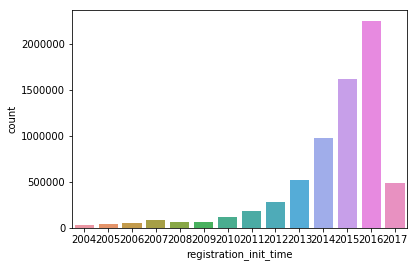

In [119]:
#Plot of new registrations years:

#how to get the years out of the dataframe:
#pd.DatetimeIndex(members_s['registration_init_time']).year

sns.countplot(x=pd.DatetimeIndex(members_s['registration_init_time']).year)



    

Conclusion: We can see that the new memberships constantly increased and reached their peak in 2016. In 2017, there is a decline in new memberships. Maybe their strategy is not that aggressive anymore, and expanding is not their main focus anymore.

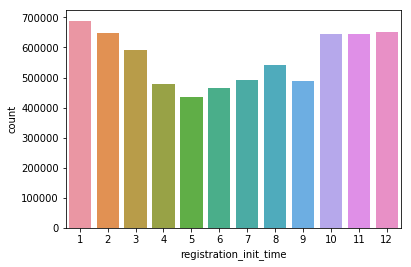

In [120]:
#Plots of new registration for the month
sns.countplot(x=pd.DatetimeIndex(members_s['registration_init_time']).month)

Conclusion: more people get registered from octobre to january

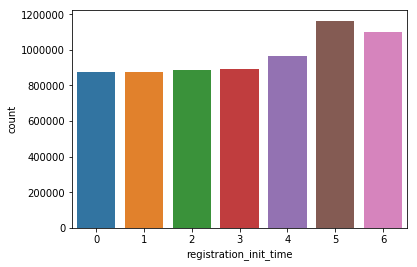

In [121]:
#Plots of new registration for the weekday
sns.countplot(x=pd.DatetimeIndex(members_s['registration_init_time']).weekday)

Conlusion: there seems to be a slight increase of registrations during weekends

## 2.3 Individual feautures vs. response variable (is_churn)

### 2.3.1 Load and merge

In [122]:
#load in training data
train = pd.read_csv("data/train.csv")
print(train.head())
print(train.count())

                                           msno  is_churn
0  waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=         1
1  QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=         1
2  fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=         1
3  mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=         1
4  XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=         1
msno        992931
is_churn    992931
dtype: int64


In [123]:
#merge members function with churn, so we can see which variable of members have a direct influene on churn
members_churn = pd.merge(members_s,
                 train,
                 on='msno')
print(members_churn.head())
print(members_churn.count())
 

                                           msno  city  bd gender  registered_via registration_init_time  is_churn
0  +tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=     1   0    NaN               7             2011-09-14         0
1  yLkV2gbZ4GLFwqTOXLVHz0VGrMYcgBGgKZ3kj9RiYu8=     4  30   male               9             2011-09-16         0
2  WH5Jq4mgtfUFXh2yz+HrcTXKS4Oess4k4W3qKolAeb0=     5  34   male               9             2011-09-16         1
3  I0yFvqMoNkM8ZNHb617e1RBzIS/YRKemHO7Wj13EtA0=    13  63   male               9             2011-09-18         0
4  OoDwiKZM+ZGr9P3fRivavgOtglTEaNfWJO4KaJcTTts=     1   0    NaN               7             2011-09-18         0
msno                      877161
city                      877161
bd                        877161
gender                    391692
registered_via            877161
registration_init_time    877161
is_churn                  877161
dtype: int64


### 2.3.2 Feature: Is_churn

In [124]:
#create 2 variable containing churn=1 and churn=0
members_churn_is0=members_churn[members_churn.is_churn==0]
members_churn_is1=members_churn[members_churn.is_churn==1]

Percentage of is_churn=1: 6.572909648285776 %


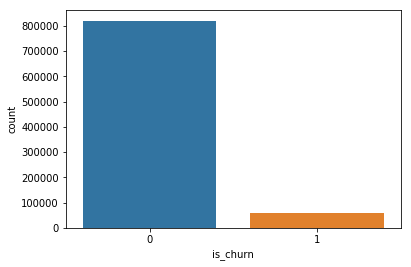

In [125]:
sns.countplot(x="is_churn", data=members_churn)
#calculate the percentage fr is_churn=1
perc_is_churn_1=100*members_churn_is1.bd.count()/(members_churn_is1.bd.count()+members_churn_is0.bd.count())
print("Percentage of is_churn=1:",perc_is_churn_1,"%")

Conclusion: only 6.5% of users seem to churn (in of the members-file)

### 2.3.3 Feature: Is_churn & Gender

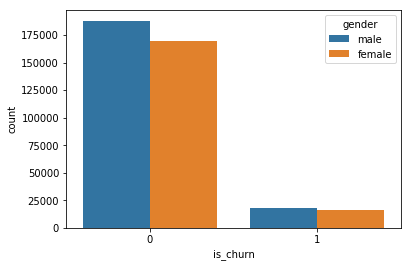

In [126]:
#plot number of churns for males and females
sns.countplot(x='is_churn', hue='gender',data=members_churn)



% of women not churning (churn=0)
91.36337159130134
% of men not churning (churn=0)
91.1553974132749
visualisation of the percentage of men and women NOT churning:


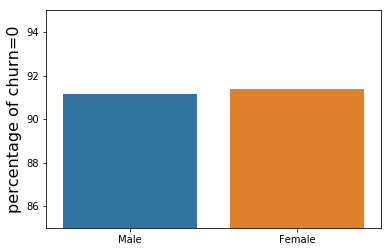

In [127]:
#What percentage of men/women churn?

#percentage of women where churn is 0
print("% of women not churning (churn=0)")
perc_w=100*members_churn_is0[members_churn_is0.gender=="female"].gender.count()/members_churn[members_churn.gender=="female"].gender.count()
print(perc_w)

#percentage of men where churn is 0
print("% of men not churning (churn=0)")
perc_m=100*members_churn_is0[members_churn_is0.gender=="male"].gender.count()/members_churn[members_churn.gender=="male"].gender.count()
print(perc_m)

p=[perc_m,perc_w]
g=["Male","Female"]
print("visualisation of the percentage of men and women NOT churning:")

plt.ylim(85, 95)
plt.ylabel('percentage of churn=0', fontsize=16)
sns.barplot(g,y=p)

Conclusion: The gender seems to have almost no influence on wether a user churns or not. The percentage rate for male/females actually having a valid entry in members is similar

### 2.3.4 Feature: Is_churn & Birthday

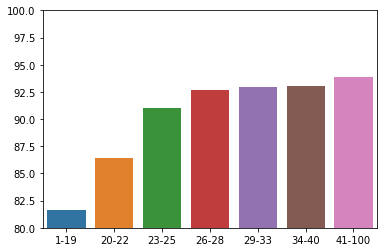

In [128]:
#form age-groups of a:1-19,b:20-22,c:23-25,d:26-28,e:29-33,f:34-40,g:41-100 and calculate their respective churn-rates
#it might be interesting to see which age groups are more likely to churn

#array of birthdays:
a=members_churn[(members_churn.bd>0)&(members_churn.bd<20)]
a=a.loc[:,['bd','is_churn']]
a_per=100*a[a.is_churn==0].bd.count()/a.bd.count()

b=members_churn[(members_churn.bd>19)&(members_churn.bd<23)]
b=b.loc[:,['bd','is_churn']]
b_per=100*b[b.is_churn==0].bd.count()/b.bd.count()

c=members_churn[(members_churn.bd>22)&(members_churn.bd<26)]
c=c.loc[:,['bd','is_churn']]
c_per=100*c[c.is_churn==0].bd.count()/c.bd.count()

d=members_churn[(members_churn.bd>25)&(members_churn.bd<29)]
d=d.loc[:,['bd','is_churn']]
d_per=100*d[d.is_churn==0].bd.count()/d.bd.count()

e=members_churn[(members_churn.bd>28)&(members_churn.bd<34)]
e=e.loc[:,['bd','is_churn']]
e_per=100*e[e.is_churn==0].bd.count()/e.bd.count()

f=members_churn[(members_churn.bd>33)&(members_churn.bd<41)]
f=f.loc[:,['bd','is_churn']]
f_per=100*f[f.is_churn==0].bd.count()/f.bd.count()

g=members_churn[(members_churn.bd>40)&(members_churn.bd<101)]
g=g.loc[:,['bd','is_churn']]
g_per=100*g[g.is_churn==0].bd.count()/g.bd.count()


year_array=['1-19','20-22', '23-25', '26-28', '29-33','34-40', '41-100']
percentage_array=[a_per,b_per,c_per,d_per,e_per,f_per,g_per]


#plot of the percentages per year
plt.ylim(80, 100)
sns.barplot(year_array,y=percentage_array)


Conclusion: there seems to be a relationship between the age and the chruning rate. The older people get, the lower is the chance that thy churn.
Let's visualize this differently:

C:\Users\rick\Miniconda3\envs\kkbox_kaggle\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


([array([6.4000e+01, 5.0000e+01, 8.7600e+02, 3.2372e+04, 8.4468e+04,
         9.5415e+04, 6.2108e+04, 3.6550e+04, 1.8510e+04, 1.0206e+04,
         8.0160e+03, 3.4910e+03, 1.5300e+03, 5.7500e+02, 1.9500e+02,
         9.3000e+01, 5.8000e+01, 4.4000e+01, 5.4000e+01, 4.5000e+01]),
  array([6.90000e+01, 5.60000e+01, 1.11400e+03, 3.92170e+04, 9.41990e+04,
         1.02782e+05, 6.67860e+04, 3.92960e+04, 1.97990e+04, 1.08730e+04,
         8.48100e+03, 3.68100e+03, 1.62700e+03, 6.22000e+02, 2.10000e+02,
         1.00000e+02, 6.50000e+01, 4.50000e+01, 6.10000e+01, 5.10000e+01])],
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ,
        54.9, 59.8, 64.7, 69.6, 74.5, 79.4, 84.3, 89.2, 94.1, 99. ]),
 <a list of 2 Lists of Patches objects>)

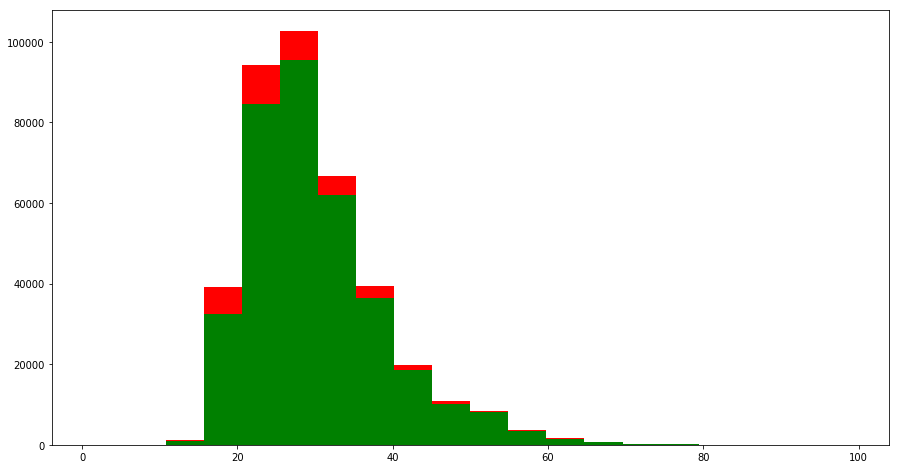

In [129]:
#create df of birthdays between 0 and 100
bd_0_100=members_churn[(members_churn.bd>0)&(members_churn.bd<100)]
bd_0_100

mpld3.enable_notebook()

#plot the churn against the not churn in a plot
figure = plt.figure(figsize=(15,8))
plt.hist([bd_0_100[bd_0_100['is_churn']==0]['bd'],bd_0_100[bd_0_100['is_churn']==1]['bd']], stacked=True, color = ['g','r'],bins = 20,label = ['churn=0','churn=1'])
#plt.xlabel('Age')
#plt.ylabel('Number of passengers')
#plt.legend()


Conclusion: same conclusion as above

### 2.3.5 Feature: Is_churn & registration_init_time

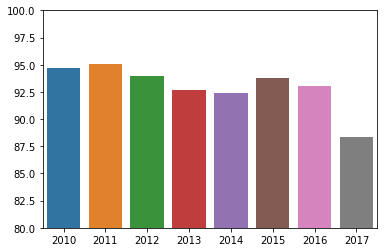

In [130]:
#Percentage for churning depending on registration year (from 2011 to 2017)

#array containing the respective years from 10-17
year=["2010","2011","2012","2013","2014","2015","2016","2017"]

#generate array with T/F values when the churn is 0 for 2010
T_10_0=pd.DatetimeIndex(members_churn_is0['registration_init_time']).year==2010 
#generate array with T/F values no matter what churn for 2010
T_10=pd.DatetimeIndex(members_churn['registration_init_time']).year==2010 
#calculate percentage of churn=0
perc_0_10=100*members_churn_is0[T_10_0].registration_init_time.count()/members_churn[T_10].registration_init_time.count()

T_11_0=pd.DatetimeIndex(members_churn_is0['registration_init_time']).year==2011 
T_11=pd.DatetimeIndex(members_churn['registration_init_time']).year==2011 
perc_0_11=100*members_churn_is0[T_11_0].registration_init_time.count()/members_churn[T_11].registration_init_time.count()

T_12_0=pd.DatetimeIndex(members_churn_is0['registration_init_time']).year==2012 
T_12=pd.DatetimeIndex(members_churn['registration_init_time']).year==2012 
perc_0_12=100*members_churn_is0[T_12_0].registration_init_time.count()/members_churn[T_12].registration_init_time.count()

T_13_0=pd.DatetimeIndex(members_churn_is0['registration_init_time']).year==2013
T_13=pd.DatetimeIndex(members_churn['registration_init_time']).year==2013 
perc_0_13=100*members_churn_is0[T_13_0].registration_init_time.count()/members_churn[T_13].registration_init_time.count()

T_14_0=pd.DatetimeIndex(members_churn_is0['registration_init_time']).year==2014 
T_14=pd.DatetimeIndex(members_churn['registration_init_time']).year==2014 
perc_0_14=100*members_churn_is0[T_14_0].registration_init_time.count()/members_churn[T_14].registration_init_time.count()

T_15_0=pd.DatetimeIndex(members_churn_is0['registration_init_time']).year==2015 
T_15=pd.DatetimeIndex(members_churn['registration_init_time']).year==2015 
perc_0_15=100*members_churn_is0[T_15_0].registration_init_time.count()/members_churn[T_15].registration_init_time.count()

T_16_0=pd.DatetimeIndex(members_churn_is0['registration_init_time']).year==2016 
T_16=pd.DatetimeIndex(members_churn['registration_init_time']).year==2016 
perc_0_16=100*members_churn_is0[T_16_0].registration_init_time.count()/members_churn[T_16].registration_init_time.count()

T_17_0=pd.DatetimeIndex(members_churn_is0['registration_init_time']).year==2017 
T_17=pd.DatetimeIndex(members_churn['registration_init_time']).year==2017 
perc_0_17=100*members_churn_is0[T_17_0].registration_init_time.count()/members_churn[T_17].registration_init_time.count()

#array containing all the percentages, in the same order than the years
per_year=[perc_0_10,perc_0_11,perc_0_12,perc_0_13,perc_0_14,perc_0_15,perc_0_16,perc_0_17]

#plot of the percentages per year
plt.ylim(80, 100)
sns.barplot(year,y=per_year)



Conclusion: the percentage of churn=0 is decreasing (especially in 2017), suggesting that a subscription made in 2017 is more likely to churn than a subscription made in earlier years. This might be interesting for feature engineering

## 2.4 Correlation analysis

### 2.4.1 Features: City & birthday

In [131]:
#Is bd=0 correlated with gender = NA, and city = 1?

#How many bd==0?
print("Count for bd=0: ",members_s[members_s.bd==0].bd.count()) 
#How many times is city==1?
print("Count for city=1: ",members_s[members_s.city==1].city.count())
#How many times is city==1 if bd==0?
print("Count for city=1 when bd=0: ",members_s[members_s.bd==0].city.count())

#What percentage of city==1 occurs if bd==0?
print("How many percent of city=1 happen when bd=0? ->",(members_s[members_s.bd==0].city.count()/members_s[members_s.city==1].city.count())*100,"%")


Count for bd=0:  4540215
Count for city=1:  4804326
Count for city=1 when bd=0:  4540215
How many percent of city=1 happen when bd=0? -> 94.502641993903 %


Conclusion: 95% of city==1 occur if birthday==0 --> there seems to be some evidence for a correlation of both variables. Maybe bd=0 and city=1 are the go-to values if there is no extra information available

### 2.4.2 Features: Gender & birthday

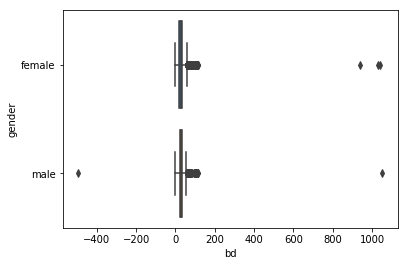

In [132]:
#Boxplot for birthday ~ gender
sns.boxplot(x="bd", y="gender", data=members_sample);

Conclusion: there seems to be no difference. Very similar distribution

In [133]:
#Null values comparison

## 2.5 Conclusion

- Birthday contains many non-sense values, and we need to take care of them. One possibility is to set them to the mean. A second possibility is to set them to 0 as well. We will have to see what effect either one of those strategies will have on the outcome of our algorithm.